##1.0 Modelling with original data (Before PCA)

In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install specific version of autokeras and tensorflow to solve compatibility issue.
!pip install autokeras==1.1
!pip install tensorflow==2.15.*
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.4/508.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-

In [ ]:
import numpy as np                      #helps for array operation.
import pandas as pd                     #helps to read the data.
import matplotlib.pyplot as plt         #helps with graphical plots.
import tensorflow as tf                 #helps for model construction.
import keras                            #helps for model construction.
import autokeras as ak                  #Auto machine learning used for neural architecture search.
import time                             #Calculate the execution time.
import shap                             # For SHAP plot.
from tensorflow.keras.models import Sequential,Model                  # Help for model construction.
from tensorflow.keras.layers import Dense,Normalization,Input         # Help for model construction.
from tensorflow.keras.optimizers import Adam                          # Adam gradient descent optimizer.
from tensorflow.keras.callbacks import EarlyStopping                  #Help for deciding the best training epoch.
from sklearn.model_selection import GridSearchCV                      #Help for parameter search.
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score          #Performance evaluation metrics.
from sklearn.svm import SVR             # Support Vector Regressor.
from sklearn.preprocessing import StandardScaler          #Help for standardizing data.

Using TensorFlow backend


##Load the data

In [ ]:
#Load the data
training_data = pd.read_csv('/content/drive/MyDrive/pda_dataset/training_dataset.csv')
testing_data = pd.read_csv('/content/drive/MyDrive/pda_dataset/testing_dataset.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/pda_dataset/validation_dataset.csv')

##Data pre-processing

In [ ]:
training_data.head()

,Country,Year,Gender,Life.expectancy,Unemployment,Infant.Mortality,GDP,GNI,Clean.fuels.and.cooking.technologies,Per.Capita,...,DPT.Immunization,HepB3.Immunization,Measles.Immunization,Hospital.beds,Basic.sanitation.services,Tuberculosis.treatment,Urban.population,Rural.population,Non.communicable.Mortality,Sucide.Rate
0,"Korea, Dem. People's Rep.",2016,Female,75.119,2.816000,13.4,28.340470,28.344977,9.000000,12668.853095,...,96.0,96.0,99.0,13.566667,82.408606,88.578947,61.471,38.529,20.1,8.5
1,Bahrain,2008,Male,74.994,0.439000,8.3,23.970181,23.933594,100.000000,23066.450982,...,97.0,97.0,99.0,1.970000,99.975538,66.000000,88.530,11.470,21.0,12.7
2,Sudan,2001,Male,56.972,13.414000,71.9,23.477976,23.440062,9.600000,456.624238,...,66.0,81.6,58.0,0.740000,20.607572,80.000000,32.548,67.452,28.1,5.2
3,"Egypt, Arab Rep.",2018,Female,74.162,21.224001,16.5,26.243578,26.218109,99.900002,2537.125185,...,95.0,95.0,94.0,1.678889,96.713941,86.000000,42.704,57.296,23.4,2.0
4,Saudi Arabia,2005,Male,71.883,4.648000,14.8,26.517680,26.525911,100.000000,13791.454762,...,96.0,97.0,97.0,2.250000,98.740014,67.000000,80.979,19.021,27.6,5.7


In [ ]:
training_data.describe()

,Year,Life.expectancy,Unemployment,Infant.Mortality,GDP,GNI,Clean.fuels.and.cooking.technologies,Per.Capita,Mortality.caused.by.road.traffic.injury,Tuberculosis.Incidence,DPT.Immunization,HepB3.Immunization,Measles.Immunization,Hospital.beds,Basic.sanitation.services,Tuberculosis.treatment,Urban.population,Rural.population,Non.communicable.Mortality,Sucide.Rate
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,2009.460144,69.717437,8.176389,30.421807,24.839075,24.860110,60.469470,12652.550961,18.264774,135.814103,85.674046,81.262131,84.864904,2.987711,70.857665,76.940657,55.353447,44.646553,22.173768,10.715903
std,5.772694,9.329938,6.025988,25.563596,2.844008,2.852382,37.067761,19816.280613,8.153306,175.171887,14.252573,18.669027,14.259288,2.305605,29.749530,14.563681,22.402225,22.402225,8.508929,11.362142
min,2000.000000,38.861000,0.062000,1.400000,17.960251,18.103257,0.000000,111.927225,0.000000,0.000000,19.000000,0.049754,16.000000,0.010000,2.755094,0.000000,8.246000,0.000000,4.400000,0.000000
25%,2005.000000,63.622750,4.321068,9.425000,22.719029,22.758867,22.900000,1332.241752,12.800000,22.000000,81.000000,75.000000,79.000000,1.300000,45.775858,73.000000,36.335504,26.325250,16.400000,4.000000
50%,2009.000000,71.407500,6.516000,23.400000,24.482832,24.509563,62.200001,4329.254833,18.229214,84.000000,90.424509,86.853253,90.000000,2.624880,84.087087,78.000000,54.978000,45.022000,22.000000,7.800000
75%,2015.000000,76.777500,10.098750,45.400000,26.870172,26.938310,99.588021,14324.118659,24.186152,160.000000,96.000000,95.000000,96.000000,3.600000,97.183321,86.000000,73.674750,63.664496,26.303597,12.400000
max,2019.000000,88.100000,41.936001,146.200000,32.103437,32.103034,100.000000,180366.715198,64.600000,1590.000000,99.000000,99.000000,99.000000,14.690000,100.000004,100.000000,100.000000,91.754000,64.100000,147.800000


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  6950 non-null   object 
 1   Year                                     6950 non-null   int64  
 2   Gender                                   6950 non-null   object 
 3   Life.expectancy                          6950 non-null   float64
 4   Unemployment                             6950 non-null   float64
 5   Infant.Mortality                         6950 non-null   float64
 6   GDP                                      6950 non-null   float64
 7   GNI                                      6950 non-null   float64
 8   Clean.fuels.and.cooking.technologies     6950 non-null   float64
 9   Per.Capita                               6950 non-null   float64
 10  Mortality.caused.by.road.traffic.injury  6950 no

In [ ]:
#Drop gender and country variables to prevent biased in country and gender stereotype
training_data=training_data.drop(['Country', 'Gender'], axis=1)
testing_data=testing_data.drop(['Country', 'Gender'], axis=1)
validation_data=validation_data.drop(['Country', 'Gender'], axis=1)

In [ ]:
#Differentiate between explanatory features and target variable, converting to float32 data type to be compatible with model
X_train = training_data.drop('Life.expectancy', axis=1).astype(np.float32)
y_train= training_data['Life.expectancy'].astype(np.float32)

X_test = testing_data.drop('Life.expectancy', axis=1).astype(np.float32)
y_test= testing_data['Life.expectancy'].astype(np.float32)

X_validation = validation_data.drop('Life.expectancy', axis=1).astype(np.float32)
y_validation= validation_data['Life.expectancy'].astype(np.float32)

In [ ]:
# Standardize the features before feeding them into the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)



##Machine learning prediction
SVM parameter search

In [ ]:
# Define the parameter for grid search
param_grid = {
 'C': [0.001, 0.01, 0.1, 1,5,10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100,500,1000]
}

# Initialize the SVR model as we are performing regression task
svr = SVR(kernel='rbf')

# Setup the grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 56 candidates, totalling 280 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


({'C': 100, 'gamma': 0.1}, 0.9842357100345668)

Building SVM model

In [ ]:
# Initialize and train the SVR model based on the summary of grid search
svr = SVR(C=100,kernel='rbf',gamma=0.1)  # Using the RBF kernel to handle non-linear relationship effectively.
svr.fit(X_train_scaled, y_train)


SVR(C=100, gamma=0.1)

Testing SVM model

In [ ]:
# Make predictions
%time y_pred_SVM = svr.predict(X_test_scaled)

# Evaluate the model
SVM_mse = mean_squared_error(y_test, y_pred_SVM)
SVM_rmse = np.sqrt(SVM_mse)
SVM_mae = mean_absolute_error(y_test, y_pred_SVM)
SVM_r2 = r2_score(y_test, y_pred_SVM)

print(f'SVM_mse: {SVM_mse}')
print(f'SVM_rmse: {SVM_rmse}')
print(f'SVM_mae: {SVM_mae}')
print(f'SVM_r2: {SVM_r2}')

CPU times: user 628 ms, sys: 1.56 ms, total: 629 ms
Wall time: 628 ms
SVM_mse: 1.1616277722058
SVM_rmse: 1.077788370787976
SVM_mae: 0.46940319595097485
SVM_r2: 0.9865148987864417


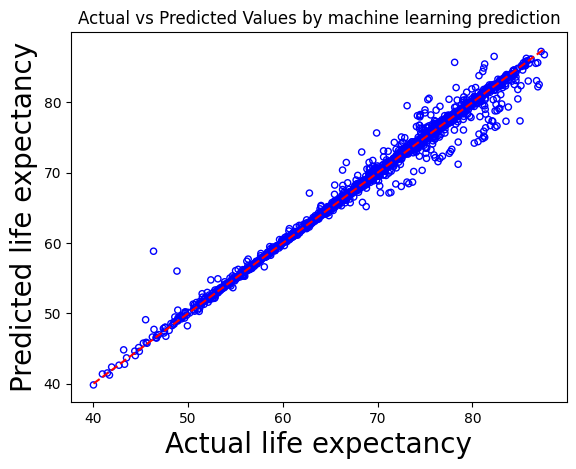

In [ ]:
# Visualization of prediction result by machine learning prediction
plt.scatter(y_test, y_pred_SVM, s=20, marker='o', edgecolor=['blue'], c='none')
plt.title('Actual vs Predicted Values by machine learning prediction')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plotting the diagonal line
plt.xlabel('Actual life expectancy', fontsize=20)
plt.ylabel('Predicted life expectancy', fontsize=20)
plt.show()

The actual and prediction results form a diagonal line, indicating ideal scenario where actual and predicted values are equal.

##Deep learning prediction
Neural Architecture search


In [ ]:
reg = ak.StructuredDataRegressor(max_trials=50, overwrite=True) # max_trials is the number of different models to try

# Fit the AutoKeras model
reg.fit(X_train, y_train, epochs=100,validation_data=(X_validation, y_validation))

# Evaluate the best model
loss, mse = reg.evaluate(X_test, y_test)
print(f'MSE: {mse}')

# Export the best model
best_model = reg.export_model()
best_model.summary()

Trial 45 Complete [00h 02m 06s]
val_loss: 1.4490293264389038

Best val_loss So Far: 1.3330296277999878
Total elapsed time: 01h 18m 13s
Epoch 1/100
218/218 [==============================] - 2s 5ms/step - loss: 940.2211 - mean_squared_error: 940.2211 - val_loss: 121.2502 - val_mean_squared_error: 121.2502
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 88.5390 - mean_squared_error: 88.5390 - val_loss: 70.8325 - val_mean_squared_error: 70.8325
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 57.8481 - mean_squared_error: 57.8481 - val_loss: 48.2162 - val_mean_squared_error: 48.2162
Epoch 4/100
218/218 [==============================] - 1s 3ms/step - loss: 39.4627 - mean_squared_error: 39.4627 - val_loss: 32.8179 - val_mean_squared_error: 32.8179
Epoch 5/100
218/218 [==============================] - 1s 3ms/step - loss: 26.7083 - mean_squared_error: 26.7083 - val_loss: 22.0494 - val_mean_squared_error: 22.0494
Epoch 6/100
218/218 [=====

Deep learning model building & training

In [ ]:
#Build the deep learning model based on the summary by neural architecture search
# Create the normalization layer and adapt it to training data.
normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)

model = Sequential([
    normalizer,
    Dense(32, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(1)  # Output layer for regression
])
# Compile the model
model.compile(optimizer = Adam(learning_rate=1e-3), loss='mean_squared_error')

# Model Summary
model.summary()

#Using early stopping mechanism to identify suitable training epochs based on the validation loss
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, verbose=1, mode='min', restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, epochs=700,validation_data=(X_validation, y_validation), callbacks=[early_stopping],verbose=2)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 19)                39        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 1024)              33792     
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 35496 (138.66 KB)
Trainable params: 35457 (138.50 KB)
Non-trainable params: 39 (160.00 Byte)
_________________________________________________________________
Epoch 1/700
218/218 - 3s - loss: 956.8547 - val_loss: 124.8927 - 3s/epoch - 12ms/

Deep learning model testing

In [ ]:
#Make Prediction on testing set
%time y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_test, y_pred)

#R2
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

63/63 [==============================] - 0s 2ms/step
CPU times: user 530 ms, sys: 42.2 ms, total: 572 ms
Wall time: 54.8 s
MSE: 0.9141876101493835
RMSE: 0.9561315774917603
MAE: 0.5790087580680847
R2: 0.9893873817347042


Visualisation of prediction result

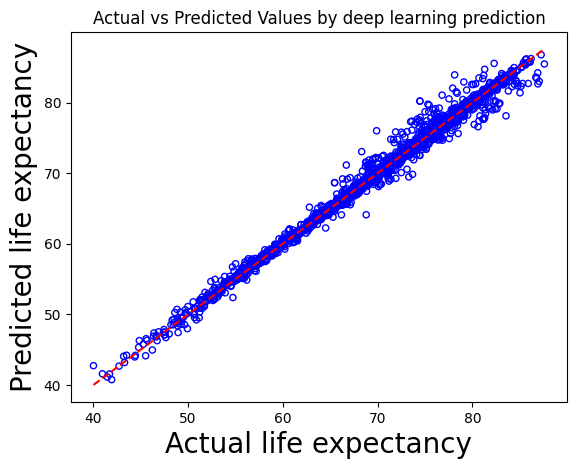

In [ ]:
# Visualization of prediction result by deep learning prediction
plt.scatter(y_test, y_pred, s=20, marker='o', edgecolor=['blue'], c='none')
plt.title('Actual vs Predicted Values by deep learning prediction')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual life expectancy', fontsize=20)
plt.ylabel('Predicted life expectancy', fontsize=20)
plt.show()

Generate a SHAP plot to explain the deep learning model

PermutationExplainer explainer: 6951it [11:23, 10.17it/s]


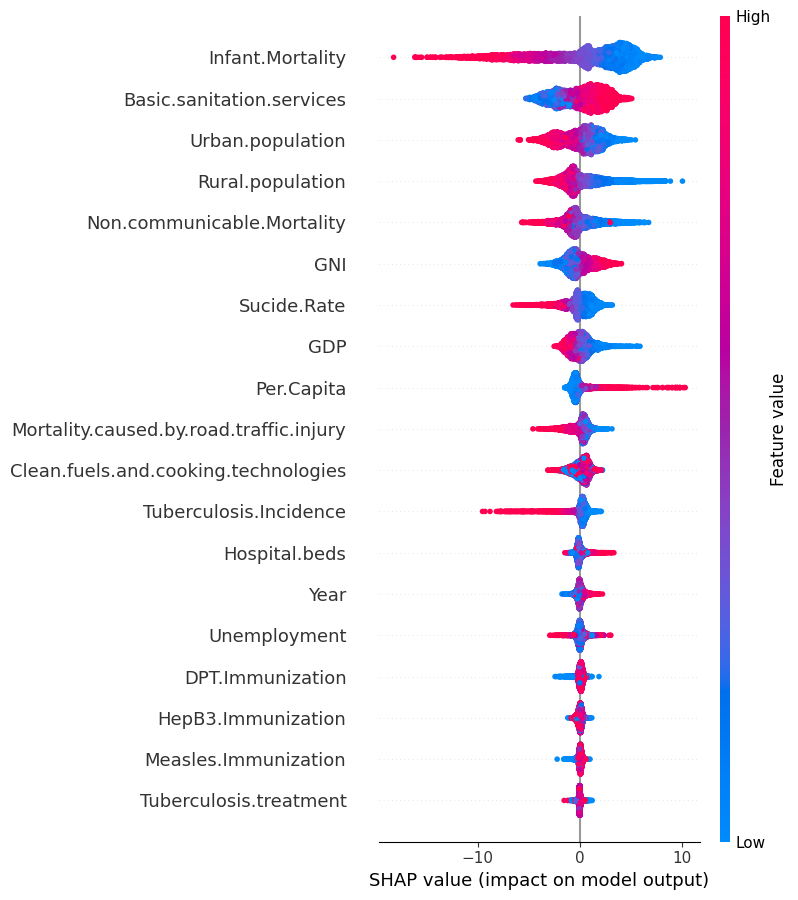

In [ ]:
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for training data
shap_values_train = explainer.shap_values(X_train)

# Plot the SHAP summary plot for training data
shap.summary_plot(shap_values_train, X_train, feature_names=["Year","Unemployment", "Infant.Mortality", "GDP", "GNI", "Clean.fuels.and.cooking.technologies", "Per.Capita", "Mortality.caused.by.road.traffic.injury", "Tuberculosis.Incidence", "DPT.Immunization", "HepB3.Immunization", "Measles.Immunization", "Hospital.beds", "Basic.sanitation.services", "Tuberculosis.treatment", "Urban.population", "Rural.population", "Non.communicable.Mortality", "Sucide.Rate"], show=False)

# Show plot
plt.show()

The SHAP plot shows the feature importance ranking in deep learning model from top to bottom. The colour encoding represents the value of the feature from low (blue) to high (red). The further a point is from the centre (zero line), the higher the impact that feature's value has on the model's prediction. For instance, infant mortality is red on the furthest left side of centre, indicating high infant mortality significantly reduce the predicted life expectancy. The rural population is blue on the furthest right side of the zero line, indicating low rural population significantly increase the predicted life expectancy.